# Dynamic Time Warping 

## Objective
Use any daily time series from Investing.com or similar source with a strong sample of covariates. Target commodities price like: Oil, Natural Gas, Resin, or Metal Prices for DTW

## Environment Setup

In [1]:
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sbn

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
savefig_options = dict(format="png", dpi=300, bbox_inches="tight")


# Computation packages
from scipy.spatial.distance import euclidean
!pip install fastdtw
from fastdtw import fastdtw

In [2]:
# method to compute the accumulated cost matrix DD for the warp path. The cost matrix uses the Euclidean distance to calculate the distance between every two points. The methods to compute the Euclidean distance matrix and accumulated cost matrix are defined below:
def compute_euclidean_distance_matrix(x, y) -> np.array:
    """Calculate distance matrix
    This method calcualtes the pairwise Euclidean distance between two sequences.
    The sequences can have different lengths.
    """
    dist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            dist[i,j] = (x[j]-y[i])**2
    return dist
def compute_accumulated_cost_matrix(x, y) -> np.array:
    """Compute accumulated cost matrix for warp path using Euclidean distance
    """
    distances = compute_euclidean_distance_matrix(x, y)

    # Initialization
    cost = np.zeros((len(y), len(x)))
    cost[0,0] = distances[0,0]
    
    for i in range(1, len(y)):
        cost[i, 0] = distances[i, 0] + cost[i-1, 0]  
        
    for j in range(1, len(x)):
        cost[0, j] = distances[0, j] + cost[0, j-1]  

    # Accumulated warp path cost
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            cost[i, j] = min(
                cost[i-1, j],    # insertion
                cost[i, j-1],    # deletion
                cost[i-1, j-1]   # match
            ) + distances[i, j] 
            
    return cost

In [3]:
# load Data
data = pd.read_csv('data/Natural Gas Futures Historical Data.csv')

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 25, 2022",416.3,413.3,419.8,407.3,8.70K,0.63%
1,"Mar 24, 2022",413.7,392.8,416.7,387.6,47.22K,4.15%
2,"Mar 23, 2022",397.2,391.9,407.2,389.2,57.46K,1.17%
3,"Mar 22, 2022",392.6,373.4,393.8,371.1,70.12K,5.77%
4,"Mar 21, 2022",371.2,374.3,378.0,362.1,66.62K,0.30%


In [5]:
data["Date"].value_counts(normalize = True)

Mar 25, 2022    0.000362
Jan 25, 2015    0.000362
Feb 05, 2015    0.000362
Feb 04, 2015    0.000362
Feb 03, 2015    0.000362
                  ...   
Aug 24, 2018    0.000362
Aug 23, 2018    0.000362
Aug 22, 2018    0.000362
Aug 21, 2018    0.000362
Dec 14, 2011    0.000362
Name: Date, Length: 2764, dtype: float64

In [6]:
data['year'] = [i[-4:] for i in data['Date']]

In [7]:
data['year'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011'], dtype=object)

In [8]:
df = data.groupby(by = ['year']).mean()
df

,Price,Open,High,Low
year,,,,
2011,165.837500,166.906250,168.175000,164.481250
2012,152.128571,152.627273,155.159740,149.887987
2013,219.460390,219.402597,222.187987,216.716234
2014,260.814981,261.246442,265.456929,256.856554
2015,169.438550,169.729008,172.681298,166.711450
2016,172.649421,172.525097,175.757143,169.390734
2017,197.490196,198.064314,200.756471,194.830196
2018,210.904297,210.869531,214.686328,207.207812
2019,178.875486,179.343191,182.037354,176.175097


### DTW between "Years" and "Price"

In [9]:
# Create two sequences
x = list(df.index.astype(int))
y = df['Price'].to_list()

In [10]:
x, y

([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 [165.8375,
  152.12857142857143,
  219.46038961038963,
  260.81498127340825,
  169.43854961832062,
  172.64942084942084,
  197.49019607843138,
  210.904296875,
  178.87548638132296,
  159.31201550387595,
  276.75444015444015,
  338.15084745762715])

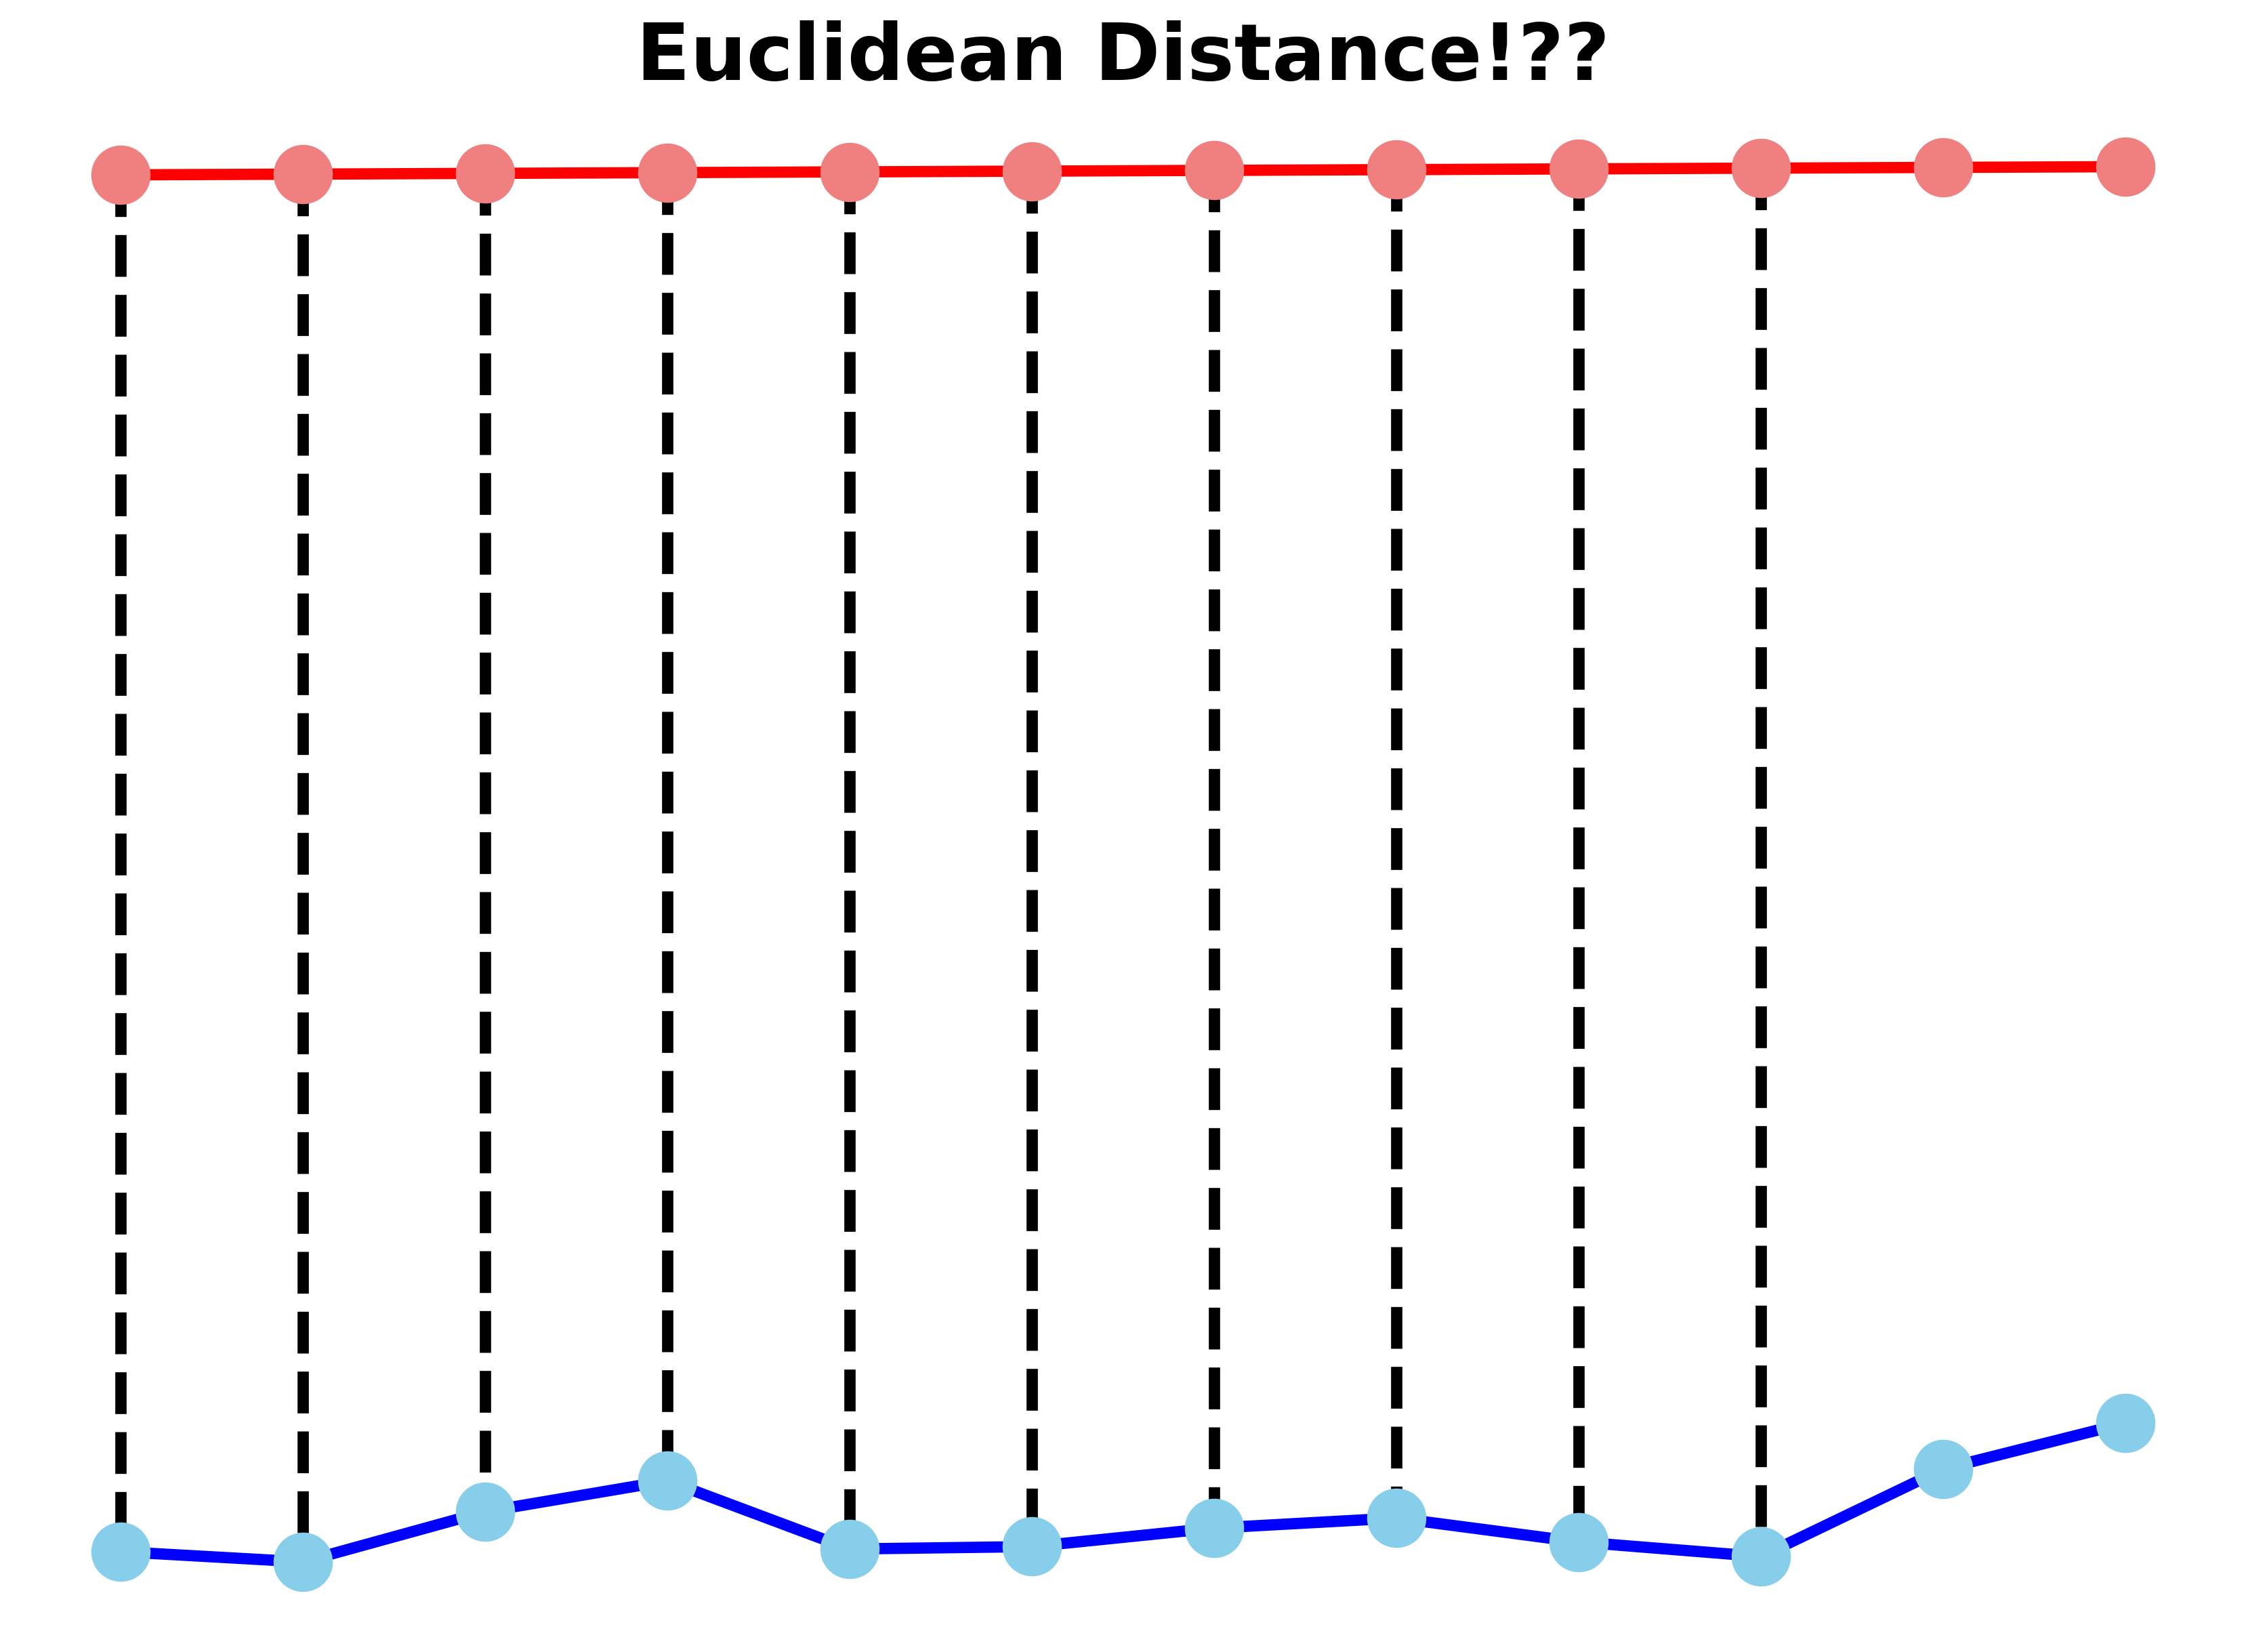

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy[:-2]):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("Euclidean Distance!??", fontsize=28, fontweight="bold")

fig.savefig("ex1_euclidean_distance.png", **savefig_options)
fig.savefig('dynamic_time_wraping.png')

## Compute DTW distance and warp path

In [82]:
dtw_distance, warp_path = fastdtw(x, y, dist=euclidean)

In [83]:
cost_matrix = compute_accumulated_cost_matrix(x, y)

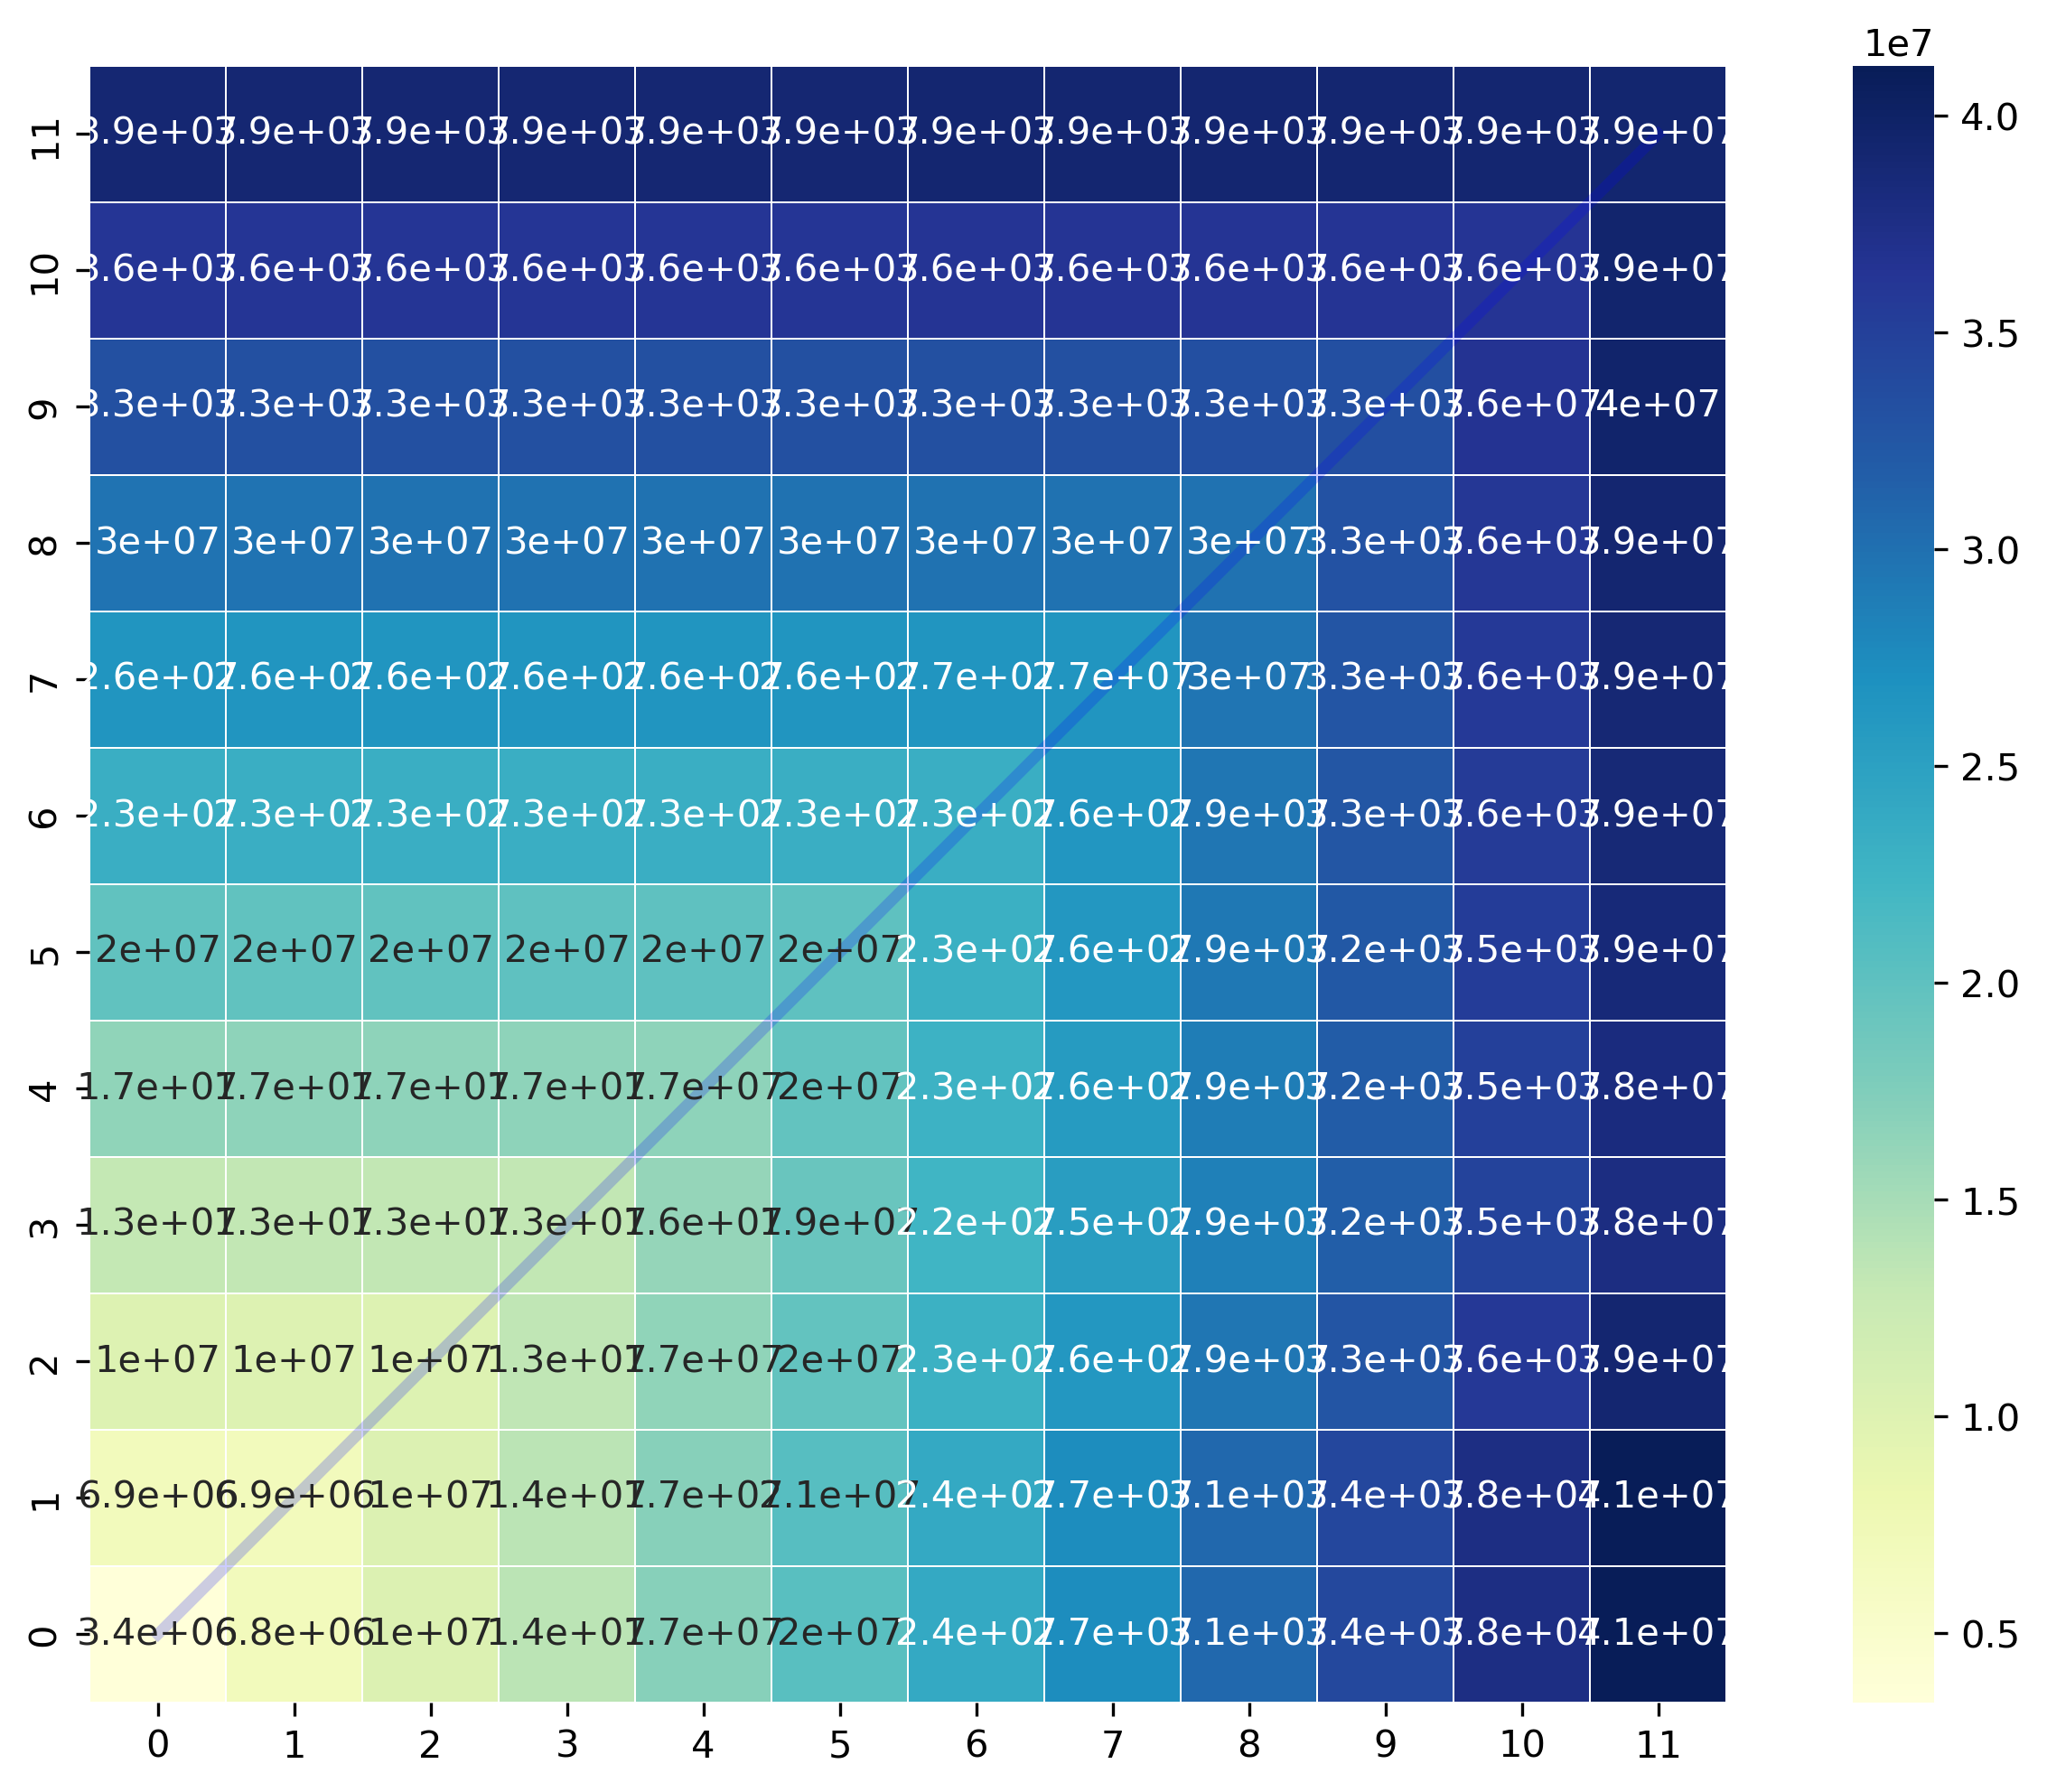

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sbn.heatmap(cost_matrix, annot=True, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()

# Get the warp path in x and y directions
path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

fig.savefig("ex1_heatmap.png", **savefig_options)

The color bar shows the cost of each point in the grid. As can be seen, the warp path (blue line) is going through the lowest cost on the grid. Let’s see the DTW distance and the warping path by printing these two variables.


In [85]:
print("DTW distance: ", dtw_distance)
print("Warp path: ", warp_path)

DTW distance:  21696.183304769194
Warp path:  [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11)]


#### The warping path starts at point (0, 0) and ends at (11, 11) by 11 moves. Let’s also calculate the accumulated cost most using the functions we defined earlier and compare the values with the heatmap.

In [86]:
cost_matrix = compute_accumulated_cost_matrix(x, y)
print(np.flipud(cost_matrix)) # Flipping the cost matrix for easier comparison with heatmap values!


[[39024293.76579484 39027640.46409992 39034458.6535247  39044985.21891847
  39059183.03333947 39076990.03916673 39098435.06460182 39123569.79119522
  39152402.64068939 39184752.860221   39220705.1589734  39260396.20058294]
 [36225869.4786331  36229338.96975279 36236514.83684148 36247359.9529574
  36261812.26047957 36279900.58760958 36301676.61589789 36327148.76708698
  36356136.2883135  36388723.88876082 36425048.23206527 39470930.29622591]
 [33218261.81678906 33221966.19275805 33229337.81775428 33240314.63415676
  33254925.47016709 33273222.00733571 33295212.6674051  33320716.69751193
  33349818.80683956 33382655.65902432 36481859.39901852 39584584.50905018]
 [29789513.42486174 29793178.67388898 29800447.11432247 29811347.5743638
  29825931.73556343 29844208.01966383 29865995.67380167 29891379.4071603
  29920495.88337607 33015977.24740128 36114977.98146394 39217500.08556406]
 [26432833.19145927 26436434.38286552 26443665.59387961 26454578.50605201
  26469181.54112516 26487293.94623577

##### The cost matrix is printed above has similar values to the heatmap.

##### Now let’s plot the two sequences and connect the mapping points. The code to plot the DTW distance between  *x*  and  *y*  is given below.

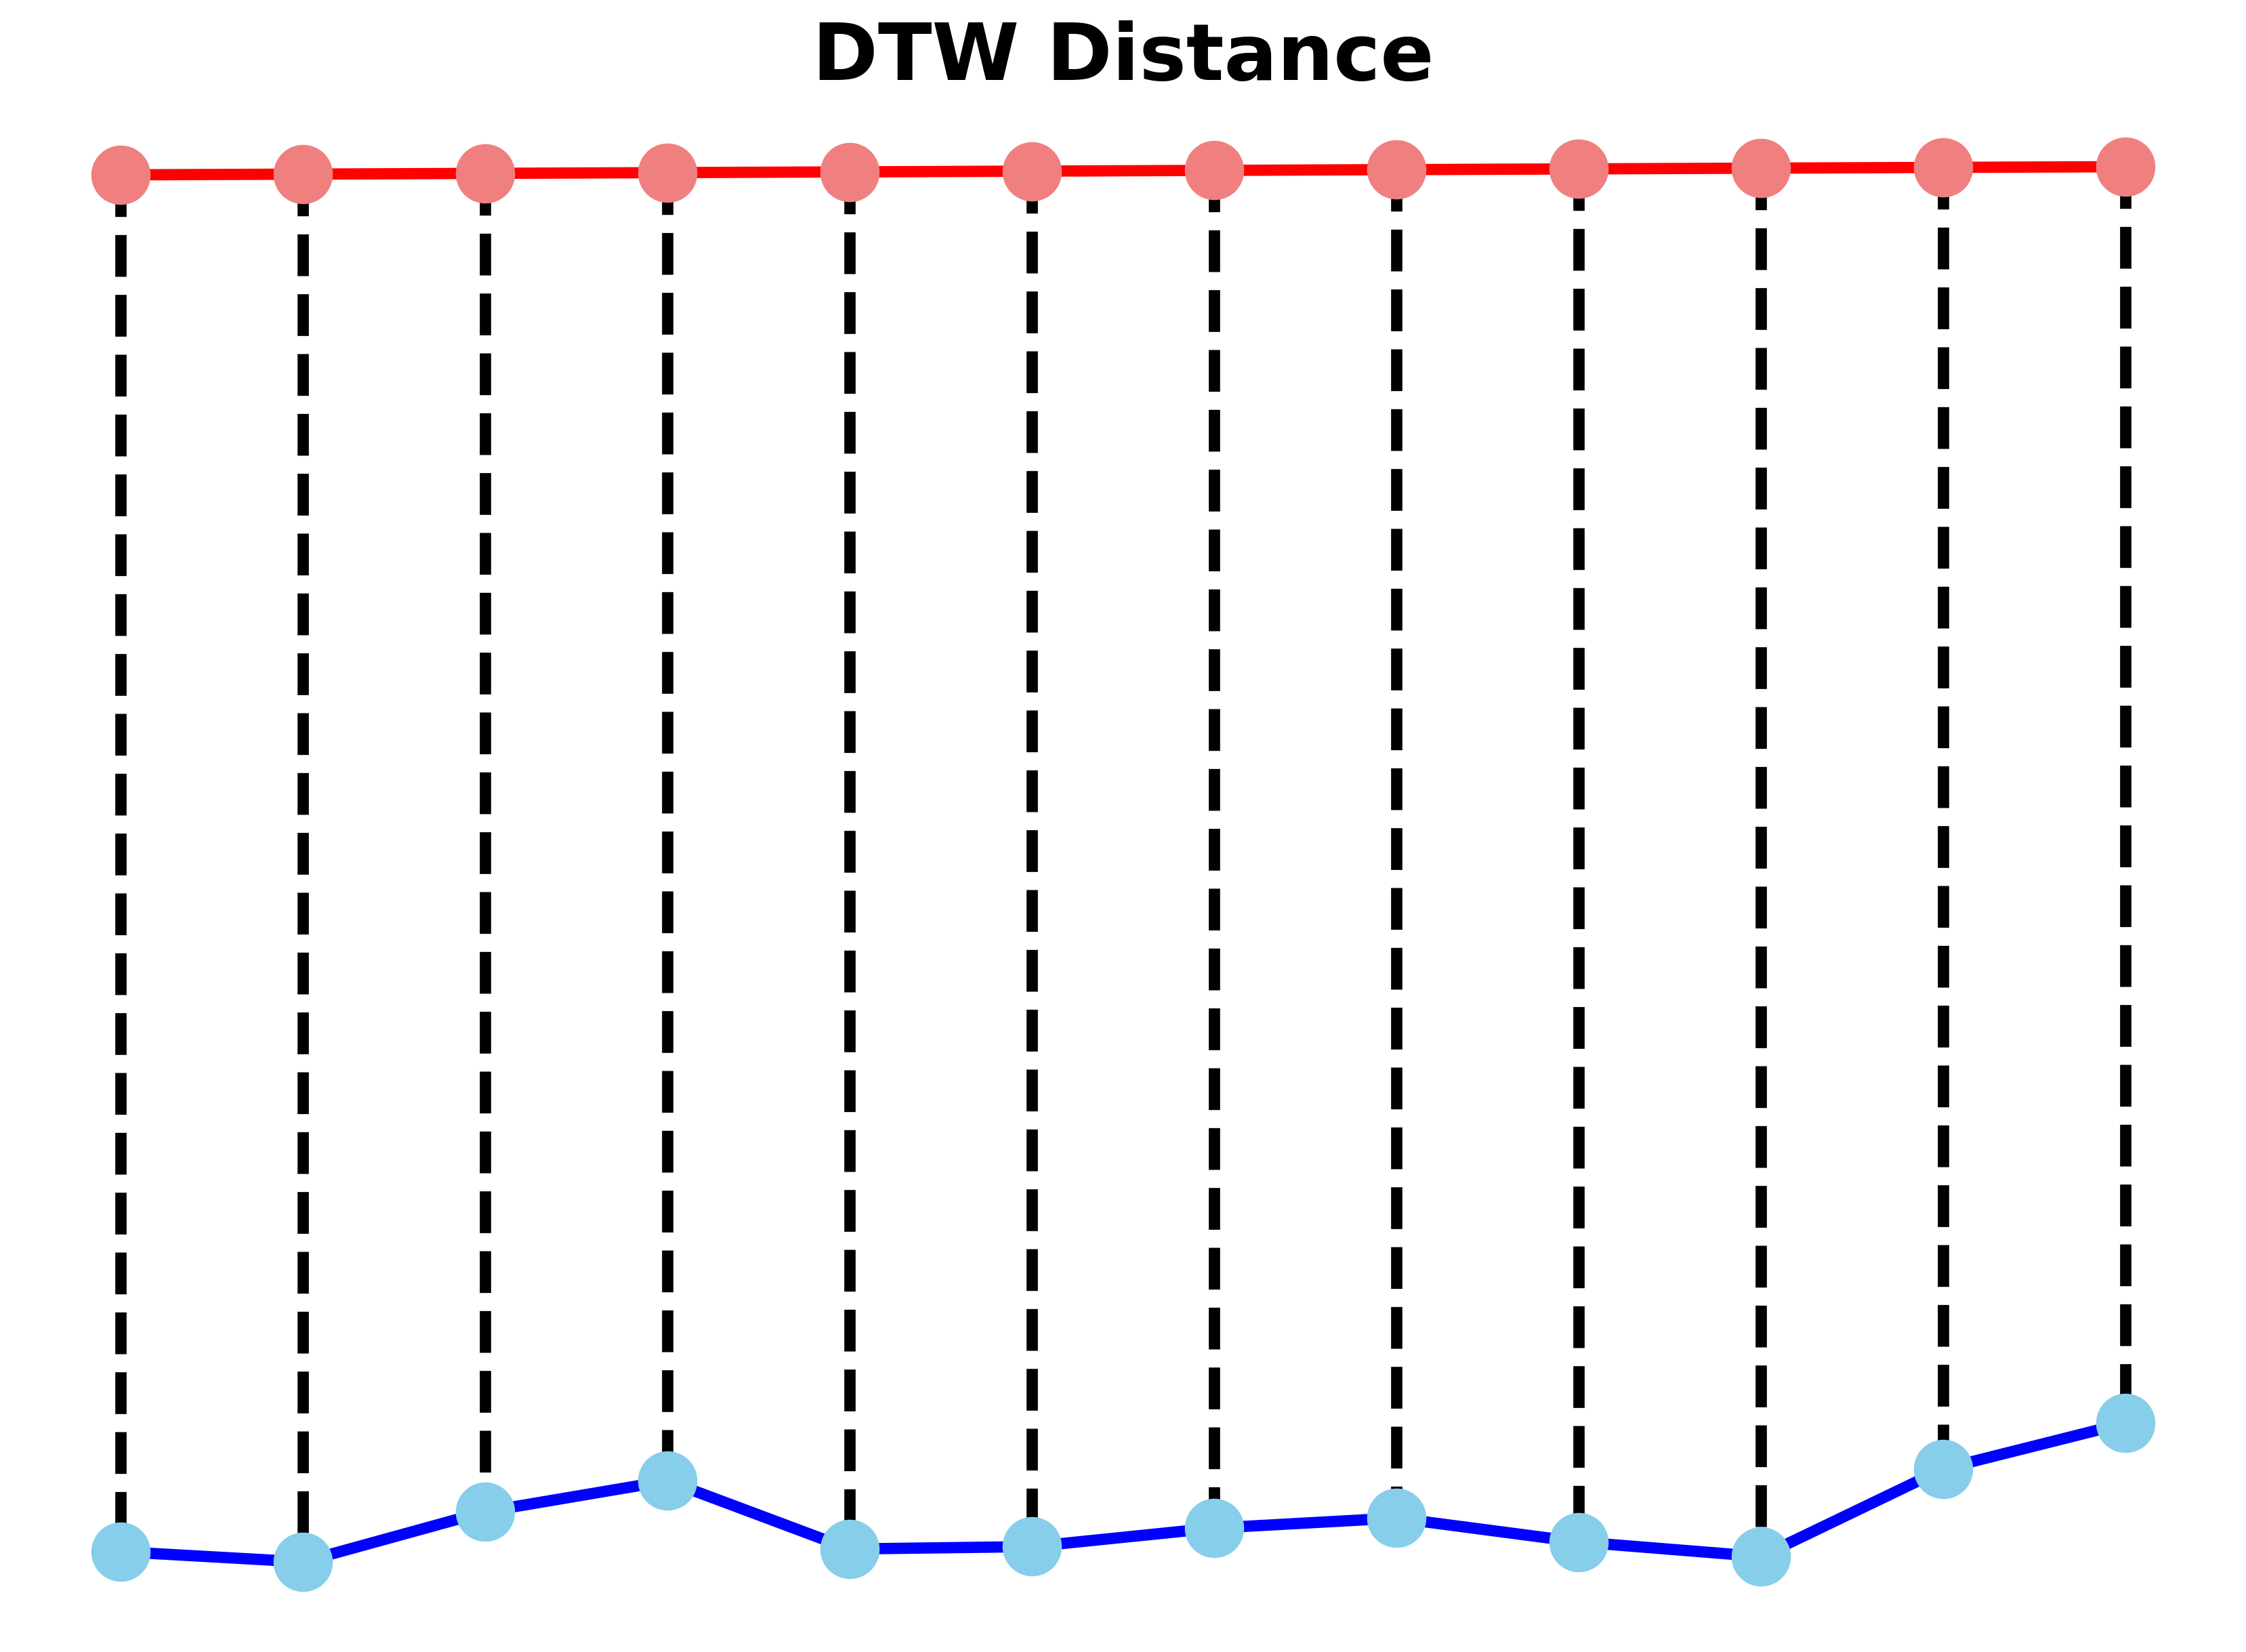

In [87]:
fig, ax = plt.subplots(figsize=(14, 10))

# Remove the border and axes ticks
fig.patch.set_visible(False)
ax.axis('off')

for [map_x, map_y] in warp_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=4, markersize=20, markerfacecolor='lightcoral', markeredgecolor='lightcoral')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=20, markerfacecolor='skyblue', markeredgecolor='skyblue')
ax.set_title("DTW Distance", fontsize=28, fontweight="bold")

fig.savefig("ex1_dtw_distance.png", **savefig_options)